In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class MGemu:
    def __init__(self, emu_folder='../../../codes/mg_boost_emu_neurons_400_400_dropout_0.0_bn_False/'):
        import pickle
        import tensorflow as tf
        import os
        with open(os.path.join(emu_folder, 'details.pickle'), 'rb') as f:
            details = pickle.load(f)
        self.bounds = details['bounds']
        self.k = details['k']
        self.scaler = details['scaler']
        self.x_train = details['x_train']
        self.y_train = details['y_train']
        self.x_test = details['x_test']
        self.y_test = details['y_test']
        self.parnames = ['Omega_m', 'lnE9As', 'h', 'mu0', 'a']
        self.model = tf.keras.models.load_model(os.path.join(emu_folder, 'model.h5'), compile=False)

    def get_original_sample(self):
        return self.x_train, self.y_train, self.x_test, self.y_test

    def _transform_space(self, x):
        return (x - self.bounds[:, 0])/(self.bounds[:, 1] - self.bounds[:, 0])

    def _check_pars(self, x):
        assert len(x) == len(self.bounds), 'Make sure all necessary parameters are passed'
        for i, xx in enumerate(x):
            if (xx < self.bounds[i, 0]) | (xx > self.bounds[i, 1]):
                raise ValueError(f'parameter {self.parnames[i]} has value {xx}, out of bounds {self.bounds[i]}')

    def get_mg_boost(self, Omega_m=None, lnE9As=None, h=None, mu0=None, a=None):
        pars = np.array([Omega_m, lnE9As, h, mu0, a])
        self._check_pars(pars)
        return self.k, np.squeeze(np.exp(self.scaler.inverse_transform(self.model(np.array([self._transform_space(pars)])))))


In [3]:
mg_emu = MGemu()

2025-03-06 14:57:19.173937: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-06 14:57:19.202447: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/ardok/mambaforge/envs/blcdm/lib/python3.12/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.4.1.post1 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persi

In [6]:
mg_emu.bounds, mg_emu.parnames

(array([[ 0.2 ,  0.5 ],
        [ 0.4 ,  1.  ],
        [ 0.6 ,  0.8 ],
        [-0.4 ,  0.4 ],
        [ 0.25,  1.  ]]),
 ['Omega_m', 'lnE9As', 'h', 'mu0', 'a'])

In [8]:
np.exp(1)

2.718281828459045

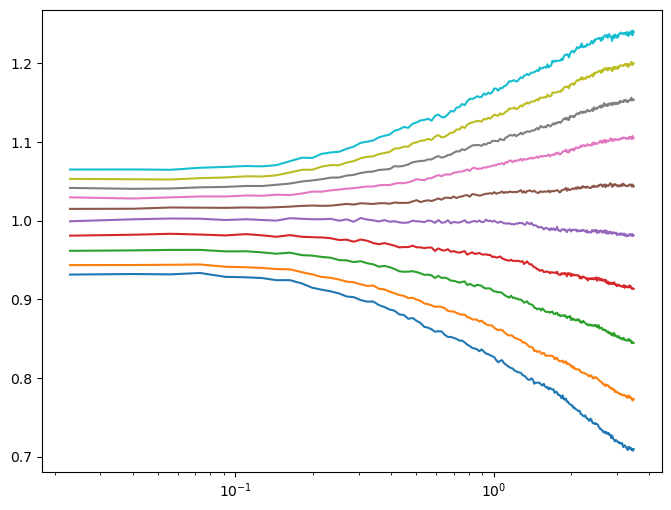

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

for mu0 in np.linspace(-0.4, 0.4, 10):
    k, Qk = mg_emu.get_mg_boost(Omega_m=0.27, lnE9As=0.4, h=0.67, mu0=mu0, a=1)

    ax.semilogx(k, Qk)

plt.show()

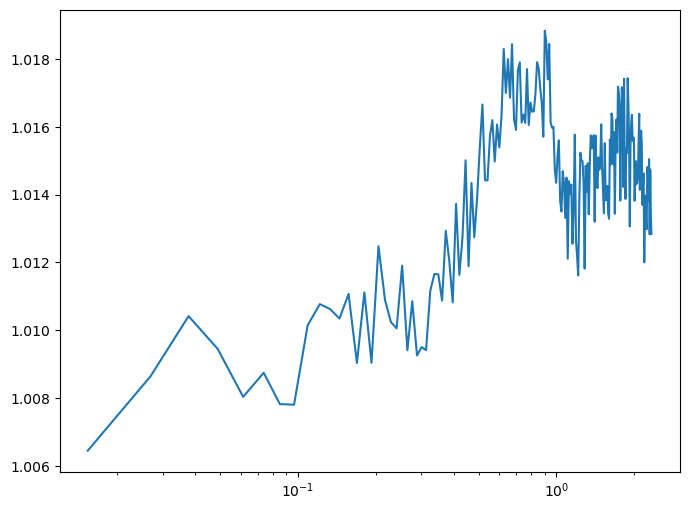

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

for mu0 in [0]:
    k, Qk = mg_emu.get_mg_boost(Omega_m=0.27, lnE9As=0.4, h=0.67, mu0=mu0, a=1)

    ax.semilogx(k*0.67, Qk)

plt.show()